In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
H0 = 100
c_const = 3*10**(5)
#n_s = 10000

data = np.loadtxt("jla_mub_0.txt")
cov_matx=np.loadtxt("jla_mub_covmatrix.txt")
z=data[:,0]
Mu = data[:,1]
cov = cov_matx.reshape(31,31)
In_c = np.linalg.inv(cov)
#print(In_c)


def eta(a,omega):
    s = ((1-omega)/(omega))**(1/3)
    x = (s**(3)+1)**(1/2)
    x1 = s/(a**(3))
    x2 = (s**(2))/(a**(2))
    x3 = (s**(3))/(a)
    x4 = (1/(a**(4)))-(0.1540*x1)+(0.4304*x2)+(0.19097*x3)+(0.066941*s**(4))
    n = 2*x*(x4**(-1/8))
    return n
    
def lum_dis(z,omega):
    g1 = 1+z
    g2 = 1/g1
    d = (c_const/H0)*g1*(eta(1,omega)-eta(g2,omega))
    return d
def mu(z,omega,h):
    mu1 = 25-(5*np.log10(h))+(5*np.log10(lum_dis(z,omega)))
    return mu1
    

def lik(omega,h):
    if (h<=0 or omega<=0):
        
        return -np.inf  
    elif (h>=1 or omega>=1):
        return -np.inf
    else:
        l = 0
        mu_theory = mu(z,omega,h)
        for i in range(31):
            for j in range(31):
                diff1=(Mu[i]-mu_theory[i])
                diff2=(Mu[j]-mu_theory[j])
                u1 = np.dot(In_c[i,j],diff1)
                l += u1*diff2
        return (-0.5)*l

In [3]:
def prior1(h):
    mean = 0.738
    std = 0.024
    m1 = 1/(np.sqrt(2*np.pi)*std)
    h_m2 = -(h-mean)**(2)
    h_m = m1*np.exp(h_m2/2)
    return h_m
def prior2(omega):
     mean = 0.738
     std = 0.024
     m1 = 1/(np.sqrt(2*np.pi)*std)
     omega_m2 = -(omega-mean)**(2)
     omega_m = m1*np.exp(omega_m2/2)
     return omega_m
    
    
    
def target(omega,h):
    P = np.exp(lik(omega,h))*prior1(h)*prior2(omega)
    return P

In [4]:
print(lik(0.6,0.5))
print(target(0.6,0.5))

-660.2074420016542
5.0177987047780406e-285


In [7]:
#Defining the Monte Carlo Markov Chain for h and Omega n times with different initial values
def MCMC(n,n_s,sig1,sig2):
    h1 = np.zeros((n,n_s))
    omega1 = np.zeros((n,n_s))
    for j in range(n):
        h = np.zeros(n_s)
        omega = np.zeros(n_s)
        h[0]=np.random.uniform(0,1)
        omega[0]=np.random.uniform(0,1)
        for i in range(1,n_s):
            cur_h = h[i-1]
            cur_omega = omega[i-1]
            propsd_h = np.random.normal(cur_h,sig1)
            propsd_omega = np.random.normal(cur_omega,sig2)
            target_ratio = target(propsd_omega,propsd_h)/(target(cur_omega,cur_h))
            y1 = target_ratio
            y = min(1,y1)
            u = np.random.uniform(0,1)
            if u<y:
                h[i] = propsd_h
                omega[i] = propsd_omega
            else:
                h[i] = cur_h
                omega[i]=cur_omega
        h1[j] = h
        omega1[j] = omega
    return omega1,h1


In [6]:
print(MCMC(4,1000,0.05,0.05))

C:\Users\sheet\AppData\Local\Temp\ipykernel_32640\1908275321.py:20: RuntimeWarning: invalid value encountered in double_scalars
  target_ratio = target(propsd_omega,propsd_h)/(target(cur_omega,cur_h))
C:\Users\sheet\AppData\Local\Temp\ipykernel_32640\1908275321.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  target_ratio = target(propsd_omega,propsd_h)/(target(cur_omega,cur_h))


(array([[0.0625143 , 0.08136653, 0.01200916, ..., 0.31483943, 0.31483943,
        0.31483943],
       [0.68698248, 0.68698248, 0.68698248, ..., 0.34752307, 0.34752307,
        0.34752307],
       [0.67915747, 0.69119135, 0.7121971 , ..., 0.32233101, 0.32233101,
        0.26828591],
       [0.88581619, 0.84708418, 0.86929179, ..., 0.34139261, 0.34139261,
        0.34139261]]), array([[ 0.04280383, -0.04393748, -0.14426229, ...,  0.69340513,
         0.69340513,  0.69340513],
       [ 0.61694978,  0.61694978,  0.61694978, ...,  0.69584338,
         0.69584338,  0.69584338],
       [ 0.02107788,  0.01138748,  0.03895651, ...,  0.69370014,
         0.69370014,  0.69998129],
       [ 0.00984437,  0.01118589,  0.04497103, ...,  0.6959256 ,
         0.6959256 ,  0.6959256 ]]))


0.709318571907254
0.28161126199311803


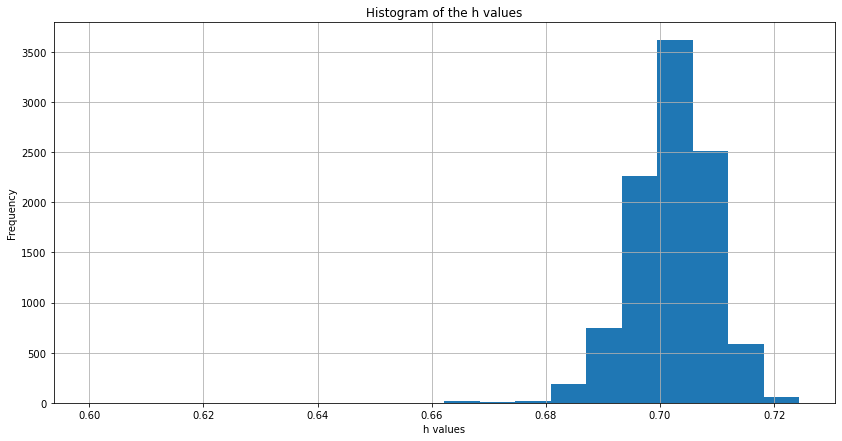

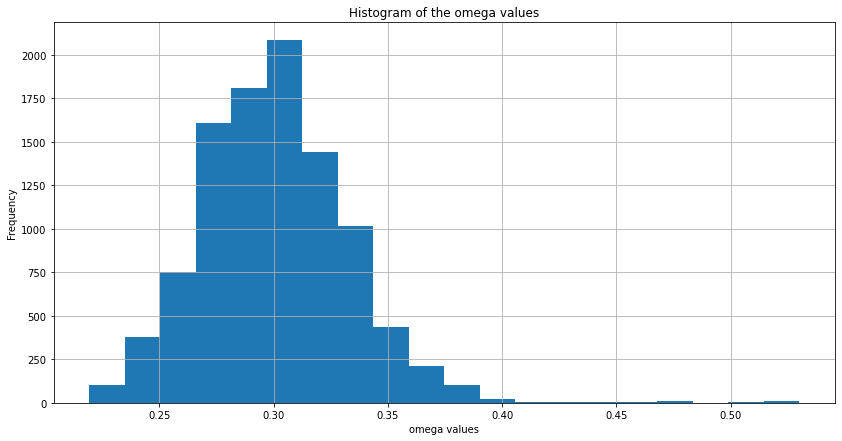

In [14]:
#Now calculate the mean of the h and omega values with prior and Importance sampling
n_s = 10000
h = np.zeros(n_s)
#print(h)
omega = np.zeros(n_s)
h[0]=0.6
omega[0]=0.5



for i in range(1,n_s):
#         h[0]=np.random.uniform(0,1)
#         omega[0]=np.random.uniform(0,1)
        cur_h = h[i-1]
        cur_omega = omega[i-1]
    #     h = proposal_distr()
    #     omega = proposal_distr()
        propsd_h = np.random.normal(cur_h,0.05)
        propsd_omega = np.random.normal(cur_omega,0.05)
        target_ratio = target(propsd_omega,propsd_h)/(target(cur_omega,cur_h))
        y1 = target_ratio
        y = min(1,y1)
        u = np.random.uniform(0,1)
        if u<y:
            h[i] = propsd_h
            omega[i] = propsd_omega
        else:
            h[i] = cur_h
            omega[i]=cur_omega




#print(w) 
#Defining the weights for the samples
for i in range(1000):
    weights1 = target(omega[i],h[i])/propsd_h
    weights2 = target(omega[i],h[i])/propsd_omega
    
#Weighted Mean with prior
#print(propsd_h)
mean_h = np.sum(h[i]*weights1)/np.sum(weights1)
mean_omega =  np.sum(omega[i]*weights2)/np.sum(weights2)
print(mean_h)
print(mean_omega)
#print(weights)
plt.figure(figsize=(14,7))
plt.hist(h,bins=20)
plt.xlabel('h values')
plt.ylabel('Frequency')
plt.title("Histogram of the h values")
plt.grid()
#print(h)
#print(mean_h)
#print(np.mean(h))
plt.show()
#print(h)
plt.figure(figsize=(14,7))
plt.hist(omega,bins=20)
plt.xlabel('omega values')
plt.ylabel('Frequency')
plt.title("Histogram of the omega values")
plt.grid()
#print(np.mean(omega))

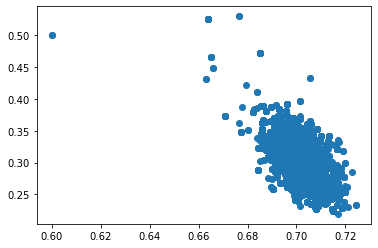

In [15]:
plt.scatter(h[:],omega[:])

In [16]:
#Calculating the mean of the h and omega values without prior
h = np.zeros(n_s)
#print(h)
omega = np.zeros(n_s)
# print(ohm)

for i in range(1,n_s):
    h[0]=np.random.uniform(0,1)
    omega[0]=np.random.uniform(0,1)
    cur_h = h[i-1]
    cur_omega = omega[i-1]
    propsd_h = np.random.normal(cur_h,0.05)
    propsd_omega = np.random.normal(cur_omega,0.05)
    lik_n1 = lik(cur_omega,cur_h)
    lik_n2 = lik(propsd_omega,propsd_h)
    y1 = np.exp((lik_n2)-(lik_n1))
    y = min(1,y1)
    u = np.random.uniform(0,1)
    if u<y:
        h[i] = propsd_h
        omega[i] = propsd_omega
    else:
        h[i] = cur_h
        omega[i]=cur_omega
          

C:\Users\sheet\AppData\Local\Temp\ipykernel_32640\2684186955.py:16: RuntimeWarning: overflow encountered in exp
  y1 = np.exp((lik_n2)-(lik_n1))


In [17]:
#Mean without prior
print(np.mean(h))
print(np.mean(omega))

0.7030155187815053
0.29414117897130926


In [18]:
#Gelman Rubin Convergence test
h_or,omega_or= MCMC(4,1000,0.5,0.5)
within_chain_var_h = np.var(h_or,axis=1,ddof=1)
h_mean = np.mean(h_or)
h_var = np.var(h_mean)
between_chain_var_h = ((h_or.shape[1]-1)/h_or.shape[0])*h_var
#print(within_chan_var)
W = np.mean(within_chain_var_h)
B = between_chain_var_h
var_hat = ((n_s - 1) / n_s) * W + (1 / n_s) * B

# Calculate potential scale reduction factor
R_hat = np.sqrt(var_hat / W)
print(R_hat)
within_chain_var_omega = np.var(omega_or,axis=1,ddof=1)
omega_mean = np.mean(omega_or)
omega_var = np.var(omega_mean)
between_chain_var_omega = ((omega_or.shape[1]-1)/omega_or.shape[0])*h_var
#print(within_chan_var)
W1 = np.mean(within_chain_var_omega)
B1 = between_chain_var_omega
var_hat1 = ((n_s - 1) / n_s) * W1 + (1 / n_s) * B1

# Calculate potential scale reduction factor
R_hat1 = np.sqrt(var_hat1 / W1)
print(R_hat1)

#If the Potential scale reduction factor is close to the 1 then the the number of  times we run the Monte Carlo Markov Chain 
#is converge.

0.9999499987499375
0.9999499987499375


C:\Users\sheet\AppData\Local\Temp\ipykernel_32640\2955354843.py:15: RuntimeWarning: invalid value encountered in double_scalars
  target_ratio = target(propsd_omega,propsd_h)/(target(cur_omega,cur_h))
